In [1]:
# Dependencies.

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn

In [2]:
cd = os.path.abspath(".") # Establish current directory.

# Read our data from csv files into two data frames.

cityDf = pd.read_csv(os.path.join(cd, 'city_data.csv'))
rideDf = pd.read_csv(os.path.join(cd, 'ride_data.csv'))
              
# Print the "city_data" data frame: it appears to describe the city name, number of drivers per city, and
# The city's type (rural, suburban, and rural)

cityDf.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
# We have 126 city records in our dataframe.

len(cityDf)

126

In [4]:
# One of the cities appears twice, before we join our city data with our ride data, 
# we need to eliminate the duplicate. We can do this by grouping by city names and applying
# an aggregate function. Here we use sum, which assumes that we have two separate but valid observations
# for the duplicated city. We could use mean instead if we thought that the duplicate
# reppresents two valid observations over time. 


cityGrouped = cityDf.groupby(['city', 'type']).sum().reset_index()
len(cityGrouped)

125

In [5]:
# Print the head of the "ride_data" data frame: it appears to list records that describe individual rides
# with the city, datetime, fare, and unique ride_id for each ride.

rideDf.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
# Our ride data frame has 2375 records. 

len(rideDf)

2375

In [7]:
# Merge the two data frames using a left join with the ride_data data frame as the left table,
# we can use this to summarize stats for our bubble chart and two of our pie charts later on.

ridesCity = pd.merge(rideDf, cityGrouped, how='left', left_on = 'city', right_on = 'city')

In [8]:
# Print the head of the combined dataframe.

ridesCity.head() 

,city,date,fare,ride_id,type,driver_count
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,Urban,46
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,Urban,35
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,Urban,55
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,Urban,68
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,Urban,8


In [9]:
# Print the length of the new data frame

len(ridesCity)

2375

In [10]:
# Aggregate summaries for total 
stats1 = {'ride_id': ['count'], 'fare': ['mean'] }

# Groupby type and aggregate counts and means using our dictionary:

summary1 = ridesCity.groupby(['city', 'type','driver_count'], as_index = False).agg(stats1)
summary1.reset_index(inplace = True)
list(summary1)

[('index', ''),
 ('city', ''),
 ('type', ''),
 ('driver_count', ''),
 ('ride_id', 'count'),
 ('fare', 'mean')]

In [11]:
summary1

,index,city,type,driver_count,ride_id,fare
,,,,,count,mean
0,0,Alvarezhaven,Urban,21,31,23.928710
1,1,Alyssaberg,Urban,67,26,20.609615
2,2,Anitamouth,Suburban,16,9,37.315556
3,3,Antoniomouth,Urban,21,22,23.625000
4,4,Aprilchester,Urban,49,19,21.981579
5,5,Arnoldview,Urban,41,31,25.106452
6,6,Campbellport,Suburban,26,15,33.711333
7,7,Carrollbury,Suburban,4,10,36.606000
8,8,Carrollfort,Urban,55,29,25.395517


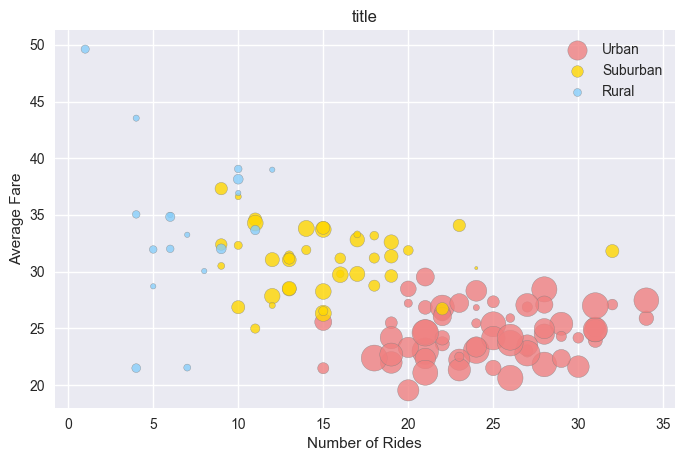

In [51]:
figa = plt.figure(figsize=(8, 5), dpi= 100)
colors = ['lightcoral', 'gold', 'lightskyblue']
ax1 = figa.add_subplot(1,1,1)

for i, color in  zip(summary1['type'].unique(), colors):
    series = summary1[summary1['type'] == i]
    
    ax1.scatter(
        series.ride_id, 
        series.fare,
        label = i,
        s = series.driver_count * 5, # Multiplying by 5 overstates the size to make it more like a bubble chart.
        c = color,
        alpha=.8,
        edgecolor='grey'
    )
ax1.legend()
ax1.set_xlabel('Number of Rides')
ax1.set_ylabel('Average Fare')
ax1.set_title('title')
plt.show()

NameError: name 'WE' is not defined

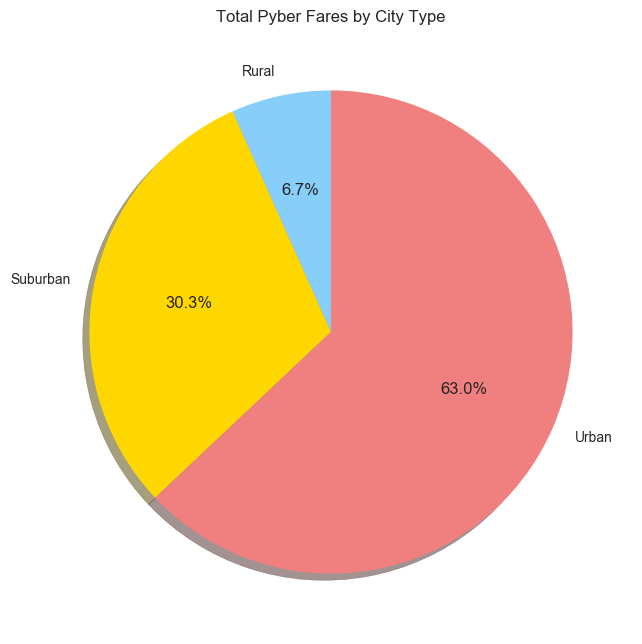

In [47]:
# For our first two pie charts we want to find the ride count and average fare by city
# type, which we can do by aggregating our original data frame using sum() and count().

stats = {'ride_id': ['count'], 'fare': ['sum'] }

# Groupby type and aggregate counts and sums using our dictionary:

rideFareSummary = ridesCity.groupby(['type']).agg(stats).reset_index()

colors = ['lightskyblue', 'gold', 'lightcoral']
sizes1 = rideFareSummary.fare
labels1 = rideFareSummary.type

figb = plt.figure(figsize=(8, 8), dpi= 100)
ax2 = figb.add_subplot(1,1,1)

ax2.pie(sizes1, labels=labels1, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
ax2.set_aspect('equal', adjustable='box') 
ax2.set_title("Total Pyber Fares by City Type")


plt.show()

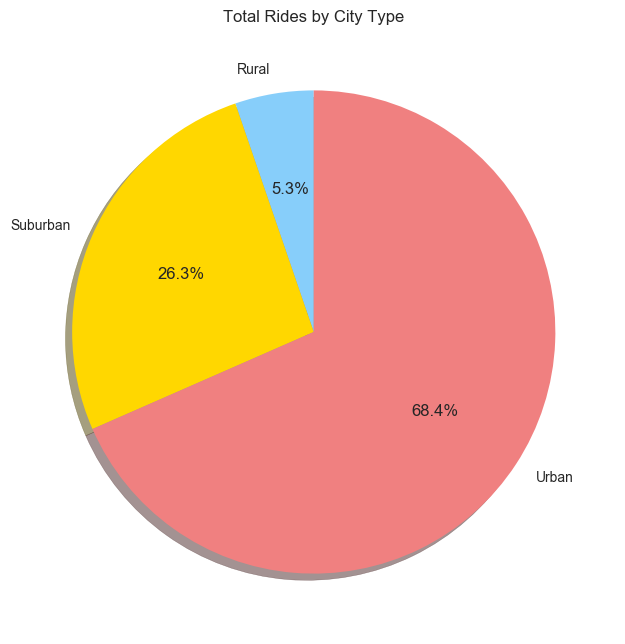

In [46]:
# We can reuse our rideFareSummary data frame for this plot too.

sizes2 = rideFareSummary.ride_id
labels2 = rideFareSummary.type

figc = plt.figure(figsize=(8, 8), dpi= 100)
ax3 = figc.add_subplot(1,1,1)

ax3.pie(sizes2, labels=labels2, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
ax3.set_aspect('equal', adjustable='box') 
ax3.set_title("Total Rides by City Type")

plt.show()

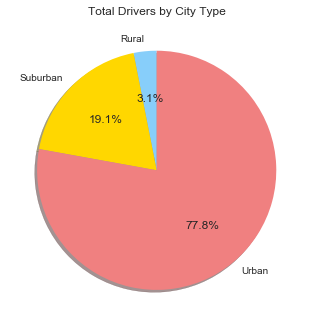

In [31]:
# For our last pie chart, we only need to find the number of drivers per type of city
# All of this data is contained in our original cityDf data frame, which we group by driver
# count using sum().

summary3 = cityGrouped.groupby(['type']).driver_count.sum()

sizes3 = summary3.values
labels3 = summary3.index

figd = plt.figure(figsize=(8, 8), dpi= 100)
ax4 = figd.add_subplot(1,1,1)

ax4.pie(sizes3, labels=labels3, autopct='%1.1f%%',  colors=colors, shadow=True, startangle=90)
ax4.set_aspect('equal', adjustable='box') 
ax4.set_title("Total Drivers by City Type")

plt.show()